In [2]:
import numpy as np
import tensorflow as tf
import gym

2024-04-19 17:52:39.054546: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 17:52:39.103669: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 17:52:39.104345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 17:52:39.877798: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Create the CartPole Environment
env = gym.make('CartPole-v1')

In [9]:
# Define the actor and critic networks
actor = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(env.action_space.n, activation='softmax')
])

critic = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])



In [15]:
# Define optimizer and loss functions
actor_optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
critic_optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)


In [17]:
# Main training loop
num_episodes = 1000
gamma = 0.99
reward_list = np.zeros( int(num_episodes/10) )
for episode in range(num_episodes):
    state = env.reset()
    episode_reward = 0

    with tf.GradientTape(persistent=True) as tape:
        for t in range(1, 10000):  # Limit the number of time steps
            # Choose an action using the actor
            action_probs = actor(np.array([state[0]]))
            action = np.random.choice(env.action_space.n, p=action_probs.numpy()[0])

            # Take the chosen action and observe the next state and reward
            next_state, reward, done, _, __ = env.step(action)

            # Compute the advantage
            state_value = critic(np.array([state[0]]))[0, 0]
            next_state_value = critic(np.array([next_state]))[0, 0]
            advantage = reward + gamma * next_state_value - state_value

            # Compute actor and critic losses
            actor_loss = -tf.math.log(action_probs[0, action]) * advantage
            critic_loss = tf.square(advantage)

            episode_reward += reward

            # Update actor and critic
            actor_gradients = tape.gradient(actor_loss, actor.trainable_variables)
            critic_gradients = tape.gradient(critic_loss, critic.trainable_variables)
            actor_optimizer.apply_gradients(zip(actor_gradients, actor.trainable_variables))
            critic_optimizer.apply_gradients(zip(critic_gradients, critic.trainable_variables))

            if done:
                break

    if episode % 10 == 0:
        print(f"Episode {episode}, Reward: {episode_reward}")
        reward_list[ int((episode)/10) ] = episode_reward

env.close()


Episode 0, Reward: 10.0
Episode 10, Reward: 24.0
Episode 20, Reward: 25.0
Episode 30, Reward: 21.0
Episode 40, Reward: 38.0
Episode 50, Reward: 38.0
Episode 60, Reward: 9.0
Episode 70, Reward: 13.0
Episode 80, Reward: 30.0
Episode 90, Reward: 12.0
Episode 100, Reward: 49.0
Episode 110, Reward: 20.0
Episode 120, Reward: 11.0
Episode 130, Reward: 13.0
Episode 140, Reward: 11.0
Episode 150, Reward: 19.0
Episode 160, Reward: 14.0
Episode 170, Reward: 26.0
Episode 180, Reward: 10.0
Episode 190, Reward: 11.0
Episode 200, Reward: 27.0
Episode 210, Reward: 26.0
Episode 220, Reward: 20.0
Episode 230, Reward: 9.0
Episode 240, Reward: 12.0
Episode 250, Reward: 13.0
Episode 260, Reward: 9.0
Episode 270, Reward: 21.0
Episode 280, Reward: 14.0
Episode 290, Reward: 27.0
Episode 300, Reward: 40.0
Episode 310, Reward: 32.0
Episode 320, Reward: 29.0
Episode 330, Reward: 12.0
Episode 340, Reward: 56.0
Episode 350, Reward: 23.0
Episode 360, Reward: 10.0
Episode 370, Reward: 13.0
Episode 380, Reward: 41.0


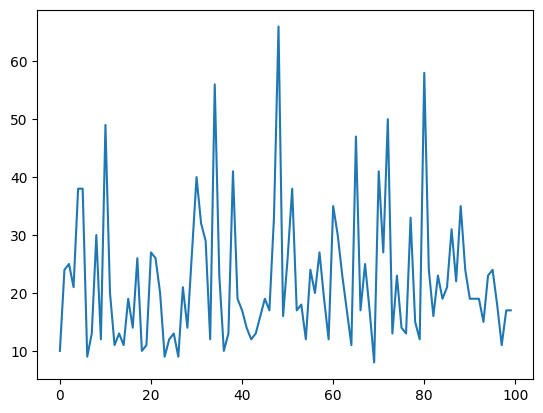

In [18]:
import matplotlib.pyplot as plt

plt.plot(reward_list[0:100])

In [13]:
print(actor.trainable_variables)

[<tf.Variable 'dense_4/kernel:0' shape=(4, 32) dtype=float32, numpy=
array([[ 0.01513819,  0.09338184,  0.2849331 , -0.38998726, -0.08149572,
         0.12006494, -0.28409472,  0.20598531, -0.15327159, -0.0163572 ,
        -0.2549385 ,  0.21058924,  0.30291605,  0.18662345, -0.10528398,
         0.11176413,  0.02047804,  0.30731884,  0.3550843 ,  0.18324104,
         0.39353108,  0.2675317 ,  0.44502446,  0.34617248,  0.27391616,
        -0.26365128,  0.42250025,  0.28576022, -0.31616977,  0.15326373,
         0.07804693, -0.10934396],
       [-0.32526287,  0.28079978,  0.07846395, -0.03237442, -0.48866764,
        -0.07854045, -0.23354942,  0.19161041,  0.17615837, -0.16015193,
        -0.28730962,  0.18479595, -0.11302728,  0.1222019 , -0.13410819,
         0.23808299, -0.37744254, -0.38557824, -0.21187095, -0.22126976,
         0.12991619,  0.13989036,  0.14841622,  0.257354  ,  0.36013025,
         0.25512064,  0.25355008,  0.22184284,  0.02117205, -0.06963621,
         0.23678556,